## Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia

### Questions....

#### 1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

#### 2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [2]:
% matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#during preliminary review we figure out that we have both NaN and
#"Not Stated" values. That is why we alighned them as NaN
dete_survey=pd.read_csv("dete_survey.csv", encoding="UTF-8", 
                             index_col=0, na_values="Not Stated")

tafe_survey=pd.read_csv("tafe_survey.csv", encoding="UTF-8")

## What columns we have to use?

In [4]:
dete_survey.head(2)

,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
ID,,,,,,,,,,,,,,,,,,,,,
1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health                               0
Traumatic i

In [6]:
len(dete_survey)

822

In [7]:
len(dete_survey.columns)

55

In [8]:
#We removed redundant information (columns). 28:49 columns
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head(2)

,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,...,Work life balance,Workload,None of the above,Professional Development,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
ID,,,,,,,,,,,,,,,,,,,,,
1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,...,False,False,True,A,56-60,NaN,NaN,NaN,NaN,Yes
2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,...,False,False,False,A,56-60,NaN,NaN,NaN,NaN,NaN


In [9]:
dete_survey_updated.isnull().sum()

SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health                               0
Traumatic i

In [10]:
# Let's drop columns which contains less than 20% meaningful values
dete_survey_updated=dete_survey_updated.dropna(axis=1, thresh=164)

In [11]:
dete_survey_updated.isnull().sum()

SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health                               0
Traumatic incident                       0
Work life b

In [12]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 1 to 823
Data columns (total 28 columns):
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition                    822 non-null bool
Lack of job security  

Conclusions: We have all we need for analysis - start and cease date, but the age columns is object. We need to reformate several columns to numeric values

In [13]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
Contributing Factors. Ill Health                                             265
Contributing Factors. Maternity/Family                                       265
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
Contributing Factors. Interp

In [15]:
tafe_survey_updated=tafe_survey_updated.dropna(thresh=140,axis=1)

In [16]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

In [17]:
len(tafe_survey)

702

We have too much extra columns which we don't take into consideration during our problem investigation and we don't intent to analyse this inquiry table, we need only values we can sort, count and use for groupping. We need only columns attributed with start and cease date, age, gender, id for merging tables. But we found different names in different tables.

## We have to arrange columns names

date_survey_updated table

We have rules for column names: 
1.lowercase, 
2.remove extra spaces at the end, 
3.substitute space with underscore_ 


In [18]:
dete_survey_updated.columns

Index(['SeparationType', 'Cease Date', 'DETE Start Date', 'Role Start Date',
       'Position', 'Classification', 'Region', 'Employment Status',
       'Career move to public sector', 'Career move to private sector',
       'Interpersonal conflicts', 'Job dissatisfaction',
       'Dissatisfaction with the department', 'Physical work environment',
       'Lack of recognition', 'Lack of job security', 'Work location',
       'Employment conditions', 'Maternity/family', 'Relocation',
       'Study/Travel', 'Ill Health', 'Traumatic incident', 'Work life balance',
       'Workload', 'None of the above', 'Professional Development', 'Age'],
      dtype='object')

In [19]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.replace("! ","").str.replace(" ","_")
dete_survey_updated.columns

Index(['separationtype', 'cease_date', 'dete_start_date', 'role_start_date',
       'position', 'classification', 'region', 'employment_status',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'interpersonal_conflicts', 'job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'maternity/family', 'relocation',
       'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance',
       'workload', 'none_of_the_above', 'professional_development', 'age'],
      dtype='object')

In [20]:
dete_survey_updated.head(5)

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,professional_development,age
ID,,,,,,,,,,,,,,,,,,,,,
1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Permanent Full-time,True,False,...,False,False,False,False,False,False,False,True,A,56-60
2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Permanent Full-time,False,False,...,False,False,False,False,False,False,False,False,A,56-60
3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Permanent Full-time,False,False,...,False,False,False,False,False,False,False,True,N,61 or older
4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,Permanent Full-time,False,True,...,False,False,False,False,False,False,False,False,A,36-40
5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,Permanent Full-time,False,False,...,False,False,False,False,False,True,False,False,A,61 or older


tafe_survey_updated table
We need to rename several columns


In [21]:
ren_dict={'Record ID': 'id','CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender',
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns=ren_dict, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [22]:
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# We need only resignation data! 
In our project we need to perform an investigation with different types 
of resignation.Let'f find them 

In [23]:
dete_survey_updated.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [24]:
tafe_survey_updated.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [25]:
date_resignation=dete_survey_updated.copy()
date_resignation=date_resignation.loc[(date_resignation.separationtype=="Resignation-Other reasons")
                                     | (date_resignation.separationtype=="Resignation-Other employer")
                                     | (date_resignation.separationtype=="Resignation-Move overseas/interstate")]
date_resignation.separationtype.value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [26]:
tafe_resignation=tafe_survey_updated.copy()
tafe_resignation=tafe_resignation.loc[tafe_resignation.separationtype=="Resignation"]
tafe_resignation.separationtype.value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Verify the Date (years)

In [27]:
date_resignation.cease_date.head(5)

ID
4     05/2012
6     05/2012
9     07/2012
10       2012
12       2012
Name: cease_date, dtype: object

In [28]:
date_resignation.cease_date=date_resignation.cease_date.str[-4:].astype("float64")

In [29]:
# cease date are ok
date_resignation.cease_date.value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [30]:
# dete_start_date are ok. No obvious outliers
date_resignation.dete_start_date.value_counts(dropna=False).sort_index()

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

Let's check difference between caase_date and dete_start_date. It suppose to be positive, otherwise -False row


In [31]:
# We can't use these rows, because we don't have all data for analisys.
# We have to drop them
date_resignation.loc[(date_resignation.cease_date > date_resignation.dete_start_date) == False]

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,professional_development,age
ID,,,,,,,,,,,,,,,,,,,,,
17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,Permanent Part-time,False,False,...,False,True,False,False,False,False,False,False,M,61 or older
40,Resignation-Move overseas/interstate,2012.0,NaN,NaN,Teacher,NaN,Central Queensland,Permanent Full-time,False,False,...,False,False,False,False,False,True,False,False,A,21-25
107,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,Central Office,Temporary Part-time,False,False,...,False,False,False,False,False,True,False,False,SA,46-50
125,Resignation-Other employer,2012.0,2012.0,2012.0,Public Servant,A01-A04,Darling Downs South West,Permanent Part-time,False,True,...,False,False,False,False,False,False,False,False,N,36-40
131,Resignation-Other employer,2012.0,2012.0,2012.0,Public Servant,AO5-AO7,Central Office,Temporary Full-time,True,False,...,False,False,False,False,False,False,False,False,D,51-55
141,Resignation-Other employer,2012.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,Permanent Part-time,False,True,...,False,False,False,False,False,False,False,False,A,51-55
180,Resignation-Other reasons,2012.0,2012.0,2012.0,Cleaner,NaN,Central Queensland,Permanent Full-time,False,False,...,False,False,False,False,False,True,False,False,SA,36-40
197,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,North Queensland,Permanent Part-time,False,False,...,False,False,False,False,False,False,False,True,SA,46-50
258,Resignation-Other reasons,2012.0,2012.0,2012.0,Public Servant,A01-A04,Darling Downs South West,Temporary Part-time,False,False,...,False,False,False,False,False,False,False,True,A,21-25


In [32]:
date_resignation=date_resignation.loc[(date_resignation.cease_date > date_resignation.dete_start_date)]
date_resignation

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,professional_development,age
ID,,,,,,,,,,,,,,,,,,,,,
4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,Permanent Full-time,False,True,...,False,False,False,False,False,False,False,False,A,36-40
6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Permanent Full-time,False,True,...,True,False,False,False,False,False,False,False,SD,41-45
9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,Permanent Full-time,False,True,...,False,False,False,False,False,False,False,False,D,31-35
10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,Permanent Part-time,False,False,...,False,False,False,False,False,False,False,False,SD,46-50
12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,Permanent Full-time,False,False,...,True,True,False,False,False,False,False,False,N,31-35
13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,Permanent Full-time,False,False,...,True,False,False,False,False,False,False,False,A,36-40
15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,Permanent Full-time,False,False,...,False,False,False,False,False,False,False,False,SA,31-35
21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,Permanent Full-time,False,False,...,False,False,False,False,False,False,False,True,A,56-60
22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,Permanent Part-time,False,False,...,False,False,False,False,False,False,False,False,SA,51-55


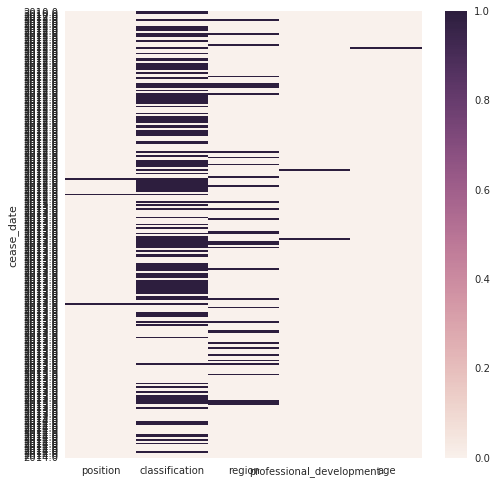

In [33]:
A=date_resignation[["cease_date","position","classification","region","professional_development","age"]].sort_values("cease_date").set_index("cease_date")
fig = plt.gcf()
fig.set_size_inches(8,8)
sns.heatmap(A.isnull())

In [34]:
tafe_resignation.dtypes

id                                                     float64
Institute                                               object
WorkArea                                                object
cease_date                                             float64
separationtype                                          object
Contributing Factors. Career Move - Public Sector       object
Contributing Factors. Career Move - Private Sector      object
Contributing Factors. Career Move - Self-employment     object
Contributing Factors. Ill Health                        object
Contributing Factors. Maternity/Family                  object
Contributing Factors. Dissatisfaction                   object
Contributing Factors. Job Dissatisfaction               object
Contributing Factors. Interpersonal Conflict            object
Contributing Factors. Study                             object
Contributing Factors. Travel                            object
Contributing Factors. Other                            

In [35]:
tafe_resignation.cease_date.dtype

dtype('float64')

In [36]:
tafe_resignation.cease_date.value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [37]:
tafe_resignation.age.value_counts()

41  45           45
46  50           39
51-55            39
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
20 or younger     9
Name: age, dtype: int64

## Create a new column (institute_service) 
We already have this column in tafe_resignation table
Let's calculate this table for dete_resignation table

In [38]:
tafe_resignation.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [39]:
date_resignation.head(3)

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,professional_development,age
ID,,,,,,,,,,,,,,,,,,,,,
4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,Permanent Full-time,False,True,...,False,False,False,False,False,False,False,False,A,36-40
6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Permanent Full-time,False,True,...,True,False,False,False,False,False,False,False,SD,41-45
9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,Permanent Full-time,False,True,...,False,False,False,False,False,False,False,False,D,31-35


In [40]:
date_resignation["institute_service"]=date_resignation.cease_date-date_resignation.dete_start_date

## Next, we'll identify any employees who resigned because they were dissatisfied

We can choose several columns from every file for analysing dissatisfaction:
1.  tafe_survey_updated:
                Contributing Factors. Dissatisfaction
                Contributing Factors. Job Dissatisfaction
2.  dete_survey_updated:
                job_dissatisfaction
                dissatisfaction_with_the_department
                physical_work_environment
                lack_of_recognition
                lack_of_job_security
                work_location
                employment_conditions
                work_life_balance
                workload

In [41]:
dd=date_resignation[["job_dissatisfaction",
                "dissatisfaction_with_the_department",
                "physical_work_environment",
                "lack_of_recognition",
                "lack_of_job_security",
                "work_location",
                "employment_conditions",
                "work_life_balance",
                "workload"]]
dd.head(3)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
ID,,,,,,,,,
4,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False


In [42]:
date_resignation["dissatisfied"]=dd.any(axis=1, skipna=False)
date_resignation.head(5)

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,professional_development,age,institute_service,dissatisfied
ID,,,,,,,,,,,,,,,,,,,,,
4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,Permanent Full-time,False,True,...,False,False,False,False,False,False,A,36-40,7.0,False
6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Permanent Full-time,False,True,...,False,False,False,False,False,False,SD,41-45,18.0,True
9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,Permanent Full-time,False,True,...,False,False,False,False,False,False,D,31-35,3.0,False
10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,Permanent Part-time,False,False,...,False,False,False,False,False,False,SD,46-50,15.0,True
12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,Permanent Full-time,False,False,...,False,False,False,False,False,False,N,31-35,3.0,False


In [43]:
dete_resignations_up=date_resignation.copy()

In [44]:
tt=tafe_resignation[["Contributing Factors. Dissatisfaction",
                "Contributing Factors. Job Dissatisfaction"]]
tt.head(10)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.

In [45]:
tt["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [46]:
tt["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [47]:
len(tt)

340

In [48]:
def update_vals(col):
    col_new=[]
    for i in col:
        if pd.isnull(i):
            j=np.nan
         
        elif i=="-":
            j=False
        else:
            j=True
        col_new.append(j)
    return col_new
tt=tt.apply(update_vals)
tt.head(5)    

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


In [49]:
tafe_resignation["dissatisfied"]=tt.any(axis=1, skipna=False)

In [50]:
tafe_resignation.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [51]:
tafe_resignations_up=tafe_resignation.copy()

We used df.apply() method for replacement values in columns to 3 types of data (True/False/Nan). We create function which was able to work with Series and combine new Series, whhich we used for replacement. Based on these results and df.any() method we constructed the new column, suitable for our future research.

## Combine the data
Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate

Before combine, we need to add a column to each dataframe that will allow us to easily distinguish between the two

In [52]:
dete_resignations_up["institute"]="DETE"
tafe_resignations_up["institute"]="TAFE"

In [53]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up], axis=0)

In [54]:
combined.isnull().sum()

Contributing Factors. Career Move - Private Sector     261
Contributing Factors. Career Move - Public Sector      261
Contributing Factors. Career Move - Self-employment    261
Contributing Factors. Dissatisfaction                  261
Contributing Factors. Ill Health                       261
Contributing Factors. Interpersonal Conflict           261
Contributing Factors. Job Dissatisfaction              261
Contributing Factors. Maternity/Family                 261
Contributing Factors. NONE                             261
Contributing Factors. Other                            261
Contributing Factors. Study                            261
Contributing Factors. Travel                           261
Institute                                              253
WorkArea                                               253
age                                                     51
career_move_to_private_sector                          340
career_move_to_public_sector                           3

In [55]:
len(combined)

593

In [56]:
combined.dropna(thresh=143,axis=1)

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,region,relocation,role_service,role_start_date,separationtype,study/travel,traumatic_incident,work_life_balance,work_location,workload
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Central Queensland,False,NaN,2006.0,Resignation-Other reasons,False,False,False,False,False
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Central Office,False,NaN,1997.0,Resignation-Other reasons,False,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,North Queensland,False,NaN,2009.0,Resignation-Other reasons,False,False,False,False,False
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,2008.0,Resignation-Other employer,False,False,False,False,False
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Far North Queensland,True,NaN,2009.0,Resignation-Move overseas/interstate,False,False,False,False,False
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Far North Queensland,False,NaN,1998.0,Resignation-Other reasons,False,False,False,False,False
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Central Queensland,False,NaN,2010.0,Resignation-Other employer,False,False,False,False,False
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Central Queensland,False,NaN,1982.0,Resignation-Other employer,False,False,False,False,False
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Darling Downs South West,False,NaN,2009.0,Resignation-Other reasons,False,False,False,False,False
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Metropolitan,False,NaN,1998.0,Resignation-Other reasons,False,False,True,False,False


### clean up the institute_service column...

In [57]:
combined.institute_service.value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2
42.0                   1


In [58]:
combined.institute_service.dtype

dtype('O')

To analyze the data, we'll convert these numbers into categories. 

We'll use the slightly modified definitions below:

*  New: Less than 3 years at a company
*  Experienced: 3-6 years at a company
*  Established: 7-10 years at a company
*  Veteran: 11 or more years at a company

In [59]:
combined.institute_service=combined.institute_service.astype("str")

In [60]:
combined.institute_service=combined.institute_service.str.replace("Less than 1 year","1")
combined.institute_service=combined.institute_service.str.replace("More than 20 years","20")
combined.institute_service=combined.institute_service.str.replace("-"," ").str.replace("."," ").str.split(" ").str[0]

In [61]:
combined.institute_service.value_counts(dropna=False)

1      159
3       83
5       56
nan     50
7       34
11      30
20      17
6       17
4       16
9       14
2       14
8        8
13       8
15       7
17       6
14       6
12       6
22       6
10       6
16       5
18       5
24       4
23       4
19       3
39       3
21       3
32       3
30       2
28       2
25       2
26       2
36       2
27       1
41       1
42       1
31       1
29       1
35       1
38       1
33       1
34       1
49       1
Name: institute_service, dtype: int64

In [62]:
combined.institute_service=combined.institute_service.astype("float")

In [63]:
def meth(el):
    if el<3:
        return "New"
    elif el<6:
        return "Experienced"
    elif el<10:
        return "Established"
    else:
        return "Veteran"
combined["service_cat"]=combined.institute_service.apply(meth)

In [64]:
combined[["institute_service","service_cat"]].head(3)

,institute_service,service_cat
4,7.0,Established
6,18.0,Veteran
9,3.0,Experienced


In [65]:
combined[["dissatisfied","service_cat","institute"]].head(3)

,dissatisfied,service_cat,institute
4,False,Established,DETE
6,True,Veteran,DETE
9,False,Experienced,DETE


In [66]:
combined.dissatisfied.value_counts(dropna=False)

False    368
True     217
NaN        8
Name: dissatisfied, dtype: int64

In [67]:
#The most frequent value in this column is False. Let's fill the missing 
# values on False
combined.dissatisfied=combined.dissatisfied.fillna(False)

In [68]:
rez1=combined.pivot_table(index="service_cat",values="dissatisfied", aggfunc=np.mean)
rez1

,dissatisfied
service_cat,
Established,0.561644
Experienced,0.316129
New,0.265896
Veteran,0.421875


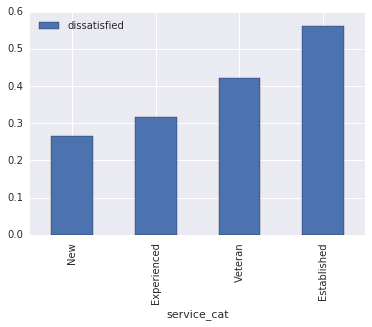

In [69]:
rez1.sort_values("dissatisfied").plot(kind="bar")

## Conclusions:
We can see, that the most dissatisfied category is "Established" - people who are in the company for quite a long time, acquire enough knowledge and pretend to any promotion and value in this company. They resignation attributed with any expectations.  

The Next category in descending order is "Veteran". People who work for a long time in this company are more or less sutisfied. Any personal reasons can couse resignation. May be for more detailed investigation we have to split this group in 2 groups with threshold=15 or 20.

The youngest categories are more satisfied. They less pretend on anything but still resign because they got skills and want any promotion. Before 6 years is the time when you fill tired of current position and need to change company is order to get higher rate. It is sort of personal crisis.

In [79]:
combined.age.value_counts()

41-45            88
46-50            71
56 or older      68
51-55            66
36-40            63
31-35            61
26-30            60
21-25            55
20 or younger    10
Name: age, dtype: int64

In [78]:
combined.age=combined.age.str.replace("  ","-").str.replace("61 or older","56 or older")
combined.age=combined.age.str.replace("56-60","56 or older")

In [81]:
rez_age=combined[["age","dissatisfied"]]
rez_age.head(3)

,age,dissatisfied
4,36-40,False
6,41-45,True
9,31-35,False


In [83]:
rez_age_pivot=rez_age.pivot_table(index="age", values="dissatisfied", aggfunc=np.mean)
rez_age_pivot

,dissatisfied
age,
20 or younger,0.200000
21-25,0.272727
26-30,0.400000
31-35,0.377049
36-40,0.349206
41-45,0.397727
46-50,0.394366
51-55,0.393939
56 or older,0.411765


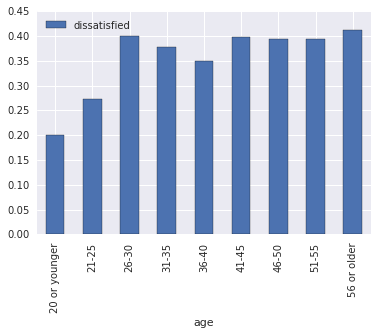

In [84]:
rez_age_pivot.plot(kind="bar")

We can see that young people less dissatisfied then mature people. There are also gap in 36-40 range. I think it can link with personal crisis. People fill expirienced enough and strong enough to change they path, their life, they want to find something new, more likeable. And don't want to sit and whait until promotion come. After 41 it takes valuable reasons for resignation. Not desire to change something in life.